## **Student Name: Bakhtiyor Sohibnazarov** \
**Student ID: SOH22590018** \
**Course: Computer Science. Artificial Intelligence Module** \
**Purpose: Coursework - 2** \
**Last Update: 01.03.2025**

## CourseWork - 2. Sustainable Transportation Solutions
#### Task 1: Define the map and the searching problem
A map of this searching problem is given in Figure 2. The cities highlighted in red **(Manchester,
Holyhead, Liverpool, York, Carlisle, Newcastle, Glasgow, Edinburgh, Oban, Aberdeen,
Inverness)** are used as delivery nodes. The roads and distances between these cities are
highlighted in white.
- Develop codes and functions to store the map information in your program.
- Define the start point and end point: Ideally, your program should ask the user to select the start and end cities for the delivery route. (At a minimum, your program should consider the case where Manchester is the starting point and Inverness is the
destination.)

List of cities:
1. Manchester
2. Liverpool
3. York
4. Newcastle
5. Edinburgh
6. Carlisle
7. Holyhead
8. Glasgow
9. Oban
10. Aberdeen
11. Inverness


Enter the number for the start city (1-11):  1
Enter the number for the end city (1-11):  11


Start city: Manchester, End city: Inverness

--- Dijkstra's Algorithm ---

--- Dijkstra's Algorithm ---
Path: ['Manchester', 'Edinburgh', 'Glasgow', 'Inverness']
Total Distance (with traffic): 502.00 miles
Carbon Emissions:
Bicycle: 0.00 kg CO₂
Ev: 50.20 kg CO₂
Petrol_car: 200.80 kg CO₂



--- A* Algorithm ---

--- A* Algorithm ---
Path: ['Manchester', 'Edinburgh', 'Glasgow', 'Inverness']
Total Distance (with traffic): 502.00 miles
Carbon Emissions:
Bicycle: 0.00 kg CO₂
Ev: 50.20 kg CO₂
Petrol_car: 200.80 kg CO₂


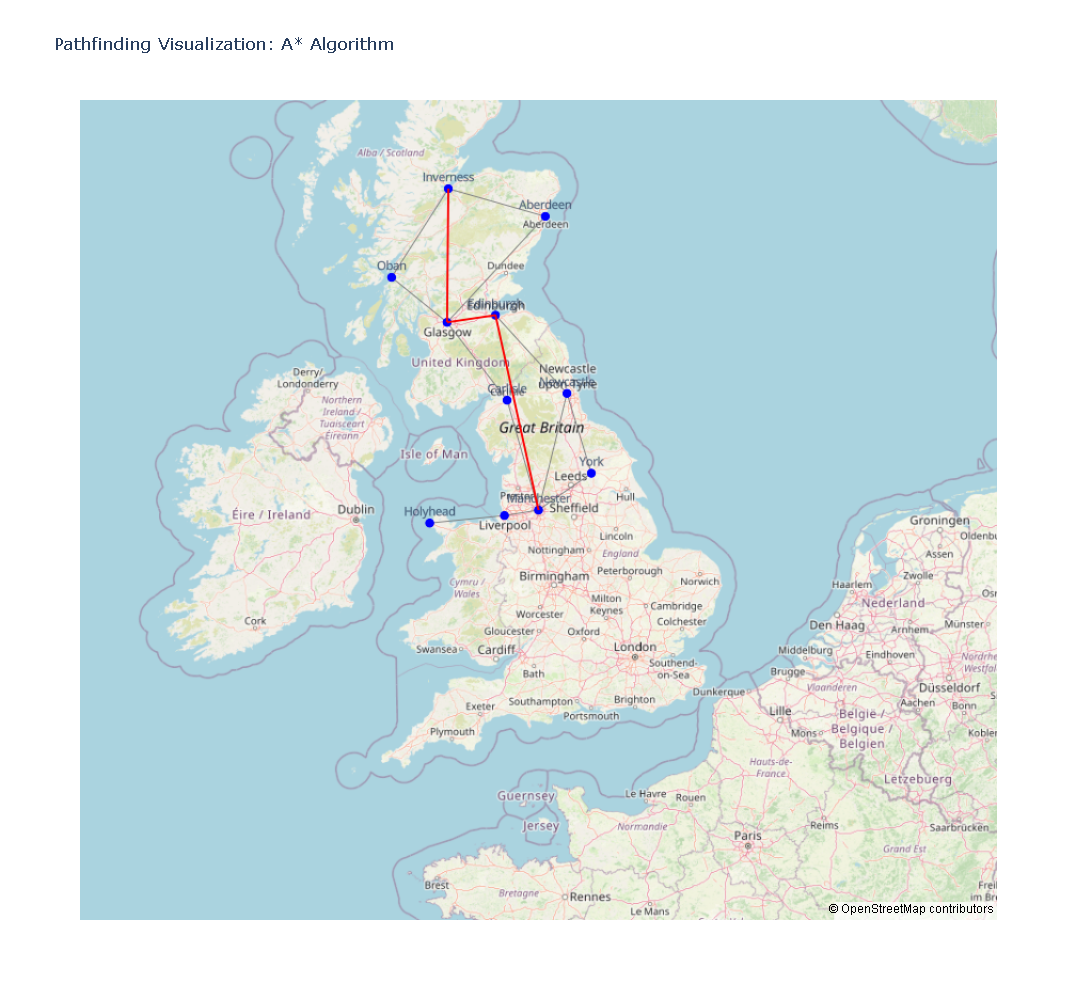


--- Breadth-First Search (BFS) ---

--- Breadth-First Search (BFS) ---
Path: ['Manchester', 'Edinburgh', 'Glasgow', 'Inverness']
Total Distance (with traffic): 502.00 miles
Carbon Emissions:
Bicycle: 0.00 kg CO₂
Ev: 50.20 kg CO₂
Petrol_car: 200.80 kg CO₂



--- Depth-First Search (DFS) ---

--- Depth-First Search (DFS) ---
Path: ['Manchester', 'Carlisle', 'Glasgow', 'Inverness']
Total Distance (with traffic): 558.00 miles
Carbon Emissions:
Bicycle: 0.00 kg CO₂
Ev: 55.80 kg CO₂
Petrol_car: 223.20 kg CO₂


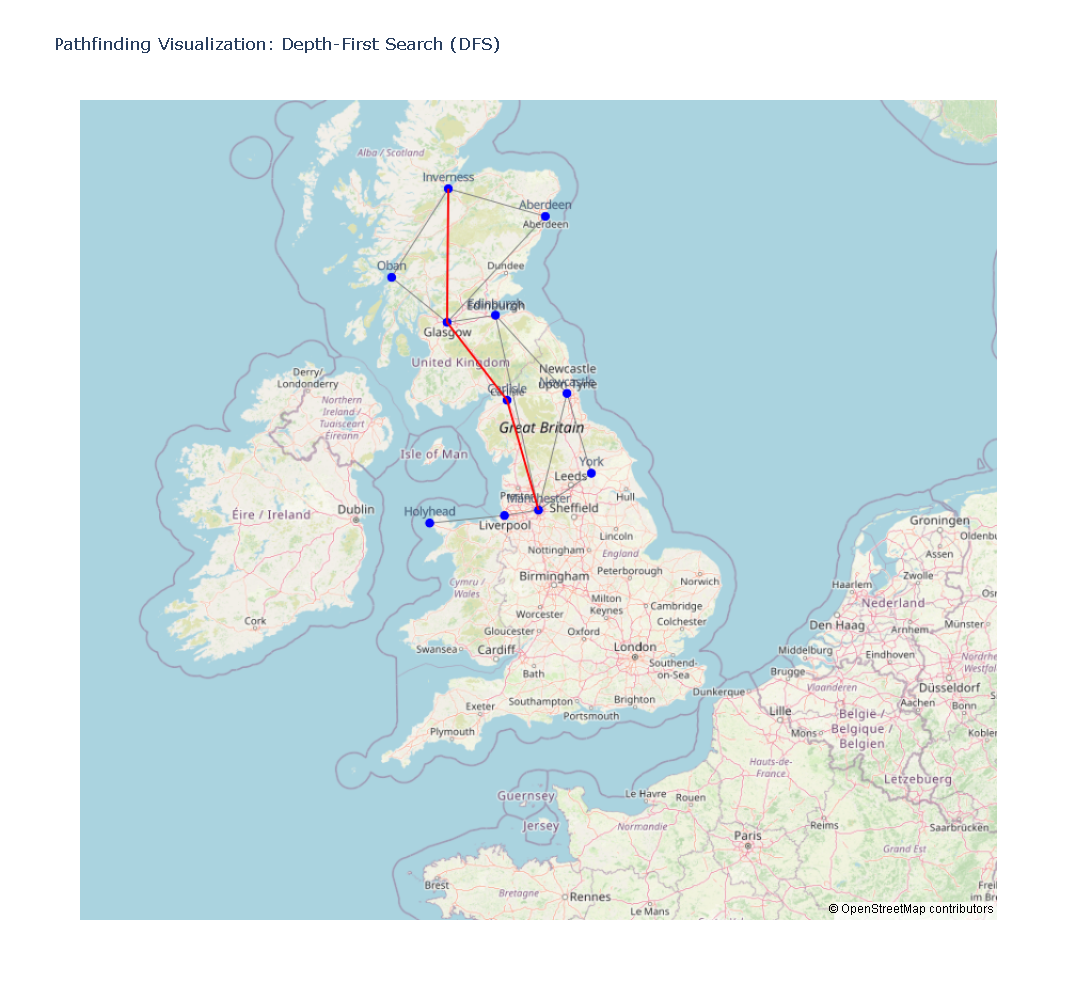

In [113]:
import networkx as nx
import plotly.graph_objects as go
from collections import deque

# Class to represent the Environment (Graph)
class Environment:
    def __init__(self):
        self.graph = nx.Graph()
        self.city_coordinates = {
            'Manchester': (53.4808, -2.2426),
            'Liverpool': (53.4084, -2.9916),
            'Holyhead': (53.3097, -4.6332),
            'York': (53.9590, -1.0815),
            'Carlisle': (54.8925, -2.9329),
            'Newcastle': (54.9783, -1.6178),
            'Glasgow': (55.8642, -4.2518),
            'Edinburgh': (55.9533, -3.1883),
            'Oban': (56.4152, -5.4716),
            'Aberdeen': (57.1497, -2.0943),
            'Inverness': (57.4778, -4.2247)
        }
        self._build_graph()
        self._apply_traffic_factors()  # Apply static traffic factors

    def _build_graph(self):
        """Build the graph from the adjacency list."""
        map_graph = {
            'Manchester': {'Liverpool': 40, 'York': 60, 'Newcastle': 130, 'Edinburgh': 220, 'Carlisle': 120},
            'Liverpool': {'Manchester': 40, 'Holyhead': 90},
            'Holyhead': {'Liverpool': 90},
            'York': {'Manchester': 60, 'Newcastle': 80},
            'Carlisle': {'Manchester': 120, 'Glasgow': 100},
            'Newcastle': {'Manchester': 130, 'York': 80, 'Edinburgh': 110},
            'Glasgow': {'Carlisle': 100, 'Edinburgh': 40, 'Oban': 90, 'Aberdeen': 140, 'Inverness': 170},
            'Edinburgh': {'Newcastle': 110, 'Glasgow': 40, 'Manchester': 220},
            'Oban': {'Glasgow': 90, 'Inverness': 110},
            'Aberdeen': {'Glasgow': 140, 'Inverness': 110},
            'Inverness': {'Oban': 110, 'Aberdeen': 110, 'Glasgow': 170}
        }
        for city, neighbors in map_graph.items():
            for neighbor, dist in neighbors.items():
                self.graph.add_edge(city, neighbor, weight=dist)
        for city, coords in self.city_coordinates.items():
            self.graph.nodes[city]['pos'] = coords

    def _apply_traffic_factors(self):
        """Apply static traffic factors to edges."""
        # Define static traffic factors for specific edges
        self.traffic_factors = {
            ('Manchester', 'Liverpool'): 1.5,  # Heavy traffic
            ('Manchester', 'York'): 1.2,       # Light traffic
            ('Manchester', 'Newcastle'): 1.3,  # Moderate traffic
            ('Liverpool', 'Holyhead'): 1.1,    # Light traffic
            ('York', 'Newcastle'): 1.4,        # Moderate traffic
            ('Carlisle', 'Glasgow'): 1.2,      # Light traffic
            ('Newcastle', 'Edinburgh'): 1.6,   # Heavy traffic
            ('Glasgow', 'Edinburgh'): 1.1,     # Light traffic
            ('Glasgow', 'Oban'): 1.3,          # Moderate traffic
            ('Glasgow', 'Aberdeen'): 1.2,      # Light traffic
            ('Glasgow', 'Inverness'): 1.4,     # Moderate traffic
            ('Oban', 'Inverness'): 1.1,        # Light traffic
            ('Aberdeen', 'Inverness'): 1.2,     # Light traffic
            ('Carlisle', 'Glasgow'): 2
        }

        # Apply traffic factors to edges
        for (u, v), factor in self.traffic_factors.items():
            if self.graph.has_edge(u, v):
                self.graph[u][v]['weight'] *= factor

    def get_cities(self):
        """Return a list of cities."""
        return list(self.graph.nodes())

    def get_city_coordinates(self, city):
        """Return the coordinates of a city."""
        return self.city_coordinates.get(city, (0, 0))

    def calculate_path_distance(self, path):
        """Calculate the total distance of a path."""
        total_distance = 0
        for i in range(len(path) - 1):
            if self.graph.has_edge(path[i], path[i + 1]):
                total_distance += self.graph[path[i]][path[i + 1]]['weight']
            else:
                return None  # No edge exists between these nodes
        return total_distance


# Class to represent the Agent (Pathfinding)
class Agent:
    def __init__(self, environment):
        self.env = environment

    def dijkstra(self, start, end):
        """Find the shortest path using Dijkstra's algorithm."""
        try:
            return nx.dijkstra_path(self.env.graph, source=start, target=end, weight='weight')
        except nx.NetworkXNoPath:
            return None

    def astar(self, start, end):
        """Find the shortest path using A* algorithm."""
        def heuristic(node, goal):
            # Euclidean distance as heuristic
            return ((self.env.city_coordinates[node][0] - self.env.city_coordinates[goal][0]) ** 2 +
                    (self.env.city_coordinates[node][1] - self.env.city_coordinates[goal][1]) ** 2) ** 0.5
        try:
            return nx.astar_path(self.env.graph, source=start, target=end, heuristic=heuristic, weight='weight')
        except nx.NetworkXNoPath:
            return None

    def bfs(self, start, end):
        """Find a path using Breadth-First Search (manually implemented)."""
        if start == end:
            return [start]

        visited = set()
        queue = deque()
        queue.append((start, [start]))  # (current_node, path)

        while queue:
            current_node, path = queue.popleft()
            visited.add(current_node)

            for neighbor in self.env.graph.neighbors(current_node):
                if neighbor == end:
                    return path + [neighbor]
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, path + [neighbor]))

        return None  # No path found

    def dfs(self, start, end):
        """Find a path using Depth-First Search (manually implemented)."""
        if start == end:
            return [start]

        visited = set()
        stack = [(start, [start])]  # (current_node, path)

        while stack:
            current_node, path = stack.pop()
            visited.add(current_node)

            for neighbor in self.env.graph.neighbors(current_node):
                if neighbor == end:
                    return path + [neighbor]
                if neighbor not in visited:
                    visited.add(neighbor)
                    stack.append((neighbor, path + [neighbor]))

        return None  # No path found


def visualize_path(environment, path, algorithm_name):
    """Visualize the path on a map using Plotly and print carbon emissions."""
    if path is None:
        print(f"No path found for {algorithm_name}.")
        return

    # Emission factors (in kg/mile)
    EMISSION_FACTORS = {
        "bicycle": 0.0,    # 0 g/mile
        "ev": 0.1,         # 100 g/mile
        "petrol_car": 0.4  # 400 g/mile
    }

    # Calculate total distance
    total_distance = environment.calculate_path_distance(path)
    if total_distance is None:
        print("Invalid path. Cannot calculate distance.")
        return

    # Calculate carbon emissions for each mode of transportation
    total_emissions = {mode: total_distance * factor for mode, factor in EMISSION_FACTORS.items()}

    # Print results
    print(f"\n--- {algorithm_name} ---")
    print(f"Path: {path}")
    print(f"Total Distance (with traffic): {total_distance:.2f} miles")
    print("Carbon Emissions:")
    for mode, emissions in total_emissions.items():
        print(f"{mode.capitalize()}: {emissions:.2f} kg CO₂")

    # Create the base map
    edge_trace = []
    for edge in environment.graph.edges():
        x0, y0 = environment.graph.nodes[edge[0]]['pos']
        x1, y1 = environment.graph.nodes[edge[1]]['pos']
        edge_trace.append(go.Scattermapbox(
            mode="lines",
            lon=[y0, y1],
            lat=[x0, x1],
            line=dict(width=1, color='gray'),
            hoverinfo='none'
        ))

    node_trace = go.Scattermapbox(
        mode="markers+text",
        lon=[environment.graph.nodes[node]['pos'][1] for node in environment.graph.nodes()],
        lat=[environment.graph.nodes[node]['pos'][0] for node in environment.graph.nodes()],
        text=[node for node in environment.graph.nodes()],
        marker=dict(size=10, color='blue'),
        textposition="top center"
    )

    # Highlight the path
    path_edges = list(zip(path[:-1], path[1:]))  # Now works because path is a list
    path_trace = []
    for edge in path_edges:
        x0, y0 = environment.graph.nodes[edge[0]]['pos']
        x1, y1 = environment.graph.nodes[edge[1]]['pos']
        path_trace.append(go.Scattermapbox(
            mode="lines",
            lon=[y0, y1],
            lat=[x0, x1],
            line=dict(width=2, color='red'),
            hoverinfo='none'
        ))

    # Create the map
    fig = go.Figure(data=edge_trace + [node_trace] + path_trace)
    fig.update_layout(
        mapbox=dict(
            style="open-street-map",
            center=dict(lat=environment.get_city_coordinates(path[0])[0], lon=environment.get_city_coordinates(path[0])[1]),
            zoom=5
        ),
        showlegend=False,
        title=f"Pathfinding Visualization: {algorithm_name}",
        height=1000  # Increase the height of the map (in pixels)
    )
    fig.show()


# Main function to run the program
def main():
    # Initialize environment and agent
    env = Environment()
    agent = Agent(env)

    # Display the list of cities
    cities = env.get_cities()
    print("List of cities:")
    for i, city in enumerate(cities, 1):
        print(f"{i}. {city}")

    # Get start and end cities from the user
    try:
        start_city_index = int(input(f"Enter the number for the start city (1-{len(cities)}): ")) - 1
        end_city_index = int(input(f"Enter the number for the end city (1-{len(cities)}): ")) - 1

        if start_city_index < 0 or start_city_index >= len(cities) or end_city_index < 0 or end_city_index >= len(cities):
            print("Invalid city number entered. Please try again.")
            return

        start_city = cities[start_city_index]
        end_city = cities[end_city_index]
        print(f"Start city: {start_city}, End city: {end_city}")

        # Run all algorithms and display results
        algorithms = {
            "Dijkstra's Algorithm": agent.dijkstra,
            "A* Algorithm": agent.astar,
            "Breadth-First Search (BFS)": agent.bfs,
            "Depth-First Search (DFS)": agent.dfs
        }

        for algorithm_name, algorithm_func in algorithms.items():
            print(f"\n--- {algorithm_name} ---")
            path = algorithm_func(start_city, end_city)
            if path:
                visualize_path(env, path, algorithm_name)
            else:
                print("No path found.")

    except ValueError:
        print("Please enter valid numbers.")


# Run the program
if __name__ == "__main__":
    main()